# Анализ рынка компьютерных игр

Интернет-магазине «Стримчик» продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Мне нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

Передо мной данные до 2016 года. Представим, что сейчас декабрь 2016 г., и я планирую кампанию на 2017-й. Нужно отработать принцип работы с данными.

В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

**План исследования:**
* Открытие файла и изучение общей информации;
* Предобработка данных;
* Исследовательский анализ данных;
* Составление портрета пользователя каждого региона;
* Проверка гипотез;
* Общий вывод.

**Описание данных**
* `Name` — название игры
* `Platform` — платформа
* `Year_of_Release` — год выпуска
* `Genre` — жанр игры
* `NA_sales` — продажи в Северной Америке (миллионы проданных копий)
* `EU_sales` — продажи в Европе (миллионы проданных копий)
* `JP_sales` — продажи в Японии (миллионы проданных копий)
* `Other_sales` — продажи в других странах (миллионы проданных копий)
* `Critic_Score` — оценка критиков (максимум 100)
* `User_Score` — оценка пользователей (максимум 10)
* `Rating` — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

## Открытие файла и изучение общей информации.

In [1]:
# Импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [2]:
# Открытие данных
games = pd.read_csv('/datasets/games.csv')

In [3]:
# Вывод первых строк набора данных методом head()
games.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [4]:
# Вывод информации о датафрейме методом info()
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


На основании общей информации видно, что:
* все названия столбцов содержат заглавные буквы;
* в столбцах `Critic_Score`, `User_Score`, `Year_of_Release`, `Name` и `Rating` содержатся пропуски, которые, вероятнее всего, связаны с отсутствием некоторых игр в рейтингах;
* столбец `Year_of_Release` имеет тип данных `float64`, хотя год выпуска может быть только целым числом;
* столбец `User_Score` имеет некорректный тип данных `object` из-за NaN-значений.

## Предобработка данных

### Корректирование названия столбцов

In [5]:
# приведение названия столбцов датафрейма games к нижнему регистру
# с помощью атрибута columns и метода str.lower()
games.columns = games.columns.str.lower()

games.columns # проверка полученного результата

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### Преобразованние типов данных

In [6]:
# Вывод типов данных каждого столбца датафрейма
games.dtypes

name                object
platform            object
year_of_release    float64
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score          object
rating              object
dtype: object

In [7]:
# Вывод уникальных значений столбца 'user_score'
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Столбец `user_score` содержит аббревиатуру `tbd`, которая расшифровывается, как `to be defined / decided / determined / discussed`, следовательно для нас это пропуски и заменить значения в таких строчках необходимо на NaN-значение.

In [8]:
# Замена значений 'tbd' на NaN
games['user_score'] = games['user_score'].replace('tbd', np.NaN)

# Преобразование столбца user_score в соответствующий тип вещественных чисел
games['user_score'] = games['user_score'].astype(float)

### Обработка пропусков

In [9]:
# нахождение (методом isna()) и подсчёт (методом sum()) пропущенных значений
games.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating             6766
dtype: int64

In [10]:
# удаление небольшой части пропусков методом dropna() и передачей списка столбцов и восстановление индексов
games = games.dropna(subset=['name', 'year_of_release', 'genre']).reset_index()
# проверка удаления пропусков
games.isna().sum()

index                 0
name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating             6676
dtype: int64

Так как восстановить корректные значения в столбцах `critic_score`, `user_score` и `rating` не представляется возможным, а их замена на среднее или медиану может повлиять на распределение (исказить его) , и удалить эти пропуски нельзя, потому что они составляют порядка 50% всего датасета - считаю, что лучше оставить их нетроннутыми.

Основными причинами пропусков могут являться:
* Повреждение файла с данными;
* Человеческий фактор;
* Технические проблемы.

### Расчёт суммарных продаж во всех регионах

In [11]:
# Подсчёт суммарных продаж и создание нового столбца 'total_sales'
games['total_sales'] = games['na_sales'] + games['eu_sales'] + games['jp_sales'] + games['other_sales']
# проверка
games.head() 

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Проверка дубликатов.

In [12]:
# проверка явных дубликатов с помощью метода duplicated() и их подсчет с помощью метода sum()
games.duplicated().sum()

0

In [13]:
# Проверка на неявные дубликаты с помощью метода unique()
display(games['name'].unique())
display(games['platform'].unique())
display(games['year_of_release'].unique())

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980.,
       1983.])

В исследуемом датафрейме отсутстуют явные и неявные дубликаты.

In [14]:
# Комментарий ревьюера 2
temp = games.copy()
temp[temp[['name', 'platform','year_of_release']].duplicated(keep=False)]

,index,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
600,604,Madden NFL 13,PS3,2012.0,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56
15969,16230,Madden NFL 13,PS3,2012.0,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E,0.01


In [15]:
# Комментарий ревьюера
# Посмотрим, что осталось
temp = games.copy() 
list_c = ['name', 'platform', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']
print(temp.info())
for col_l in list_c:
  print('-'* 25)
  print(col_l, temp[col_l].sort_values().unique())
  print(col_l,': кол-во NaN',temp[col_l].isna().sum(),
        ', процент NaN', round(temp[col_l].isna().mean()*100,2),'%') 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16444 non-null  int64  
 1   name             16444 non-null  object 
 2   platform         16444 non-null  object 
 3   year_of_release  16444 non-null  float64
 4   genre            16444 non-null  object 
 5   na_sales         16444 non-null  float64
 6   eu_sales         16444 non-null  float64
 7   jp_sales         16444 non-null  float64
 8   other_sales      16444 non-null  float64
 9   critic_score     7983 non-null   float64
 10  user_score       7463 non-null   float64
 11  rating           9768 non-null   object 
 12  total_sales      16444 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 1.6+ MB
None
-------------------------
name [' Beyblade Burst' ' Fire Emblem Fates' " Frozen: Olaf's Quest" ...
 'uDraw Studio' 'uDraw Studio: Inst

In [16]:
# Заполняю пропуски в столбце 'rating' заглушкой 'WR'(Without rating)
games['rating'] = games['rating'].fillna('WR')
games['rating'].isna().sum() # проверка отсутствия пропусков

0

На этапе предобработки данных все названия столбцов были приведены к нижнему регистру. В столбце `user_score` аббревиатура `tbd` была заменена на NaN-значения. Обработана и удалена часть пропусков, которая не является критичной для датасета. Пропуски в столбце `rating` были заменены на заглушку `WR`(Without Rating). Остальные пропуски остались нетроннутыми. Проверка показала отсутствие явных и неявных дубликатов в исследуемом датафрейме.

## Исследовательский анализ данных

### Выпуск игр в разные годы

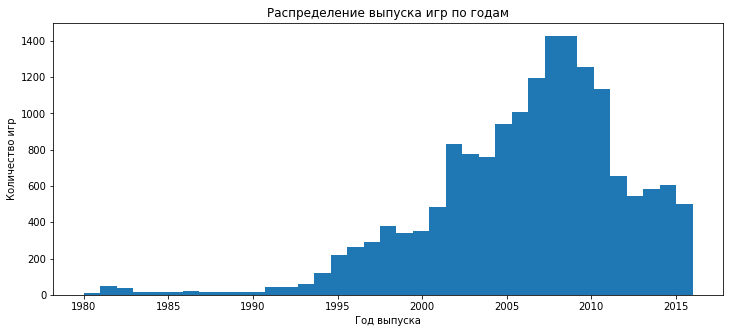

In [17]:
# вывод гистограммы количества выпущенных игр за каждый год
plt.figure(figsize = (12, 5))
plt.hist(games['year_of_release'], bins=37)
plt.title('Распределение выпуска игр по годам')
plt.ylabel('Количество игр')
plt.xlabel('Год выпуска')
plt.show()

По гистограмме видно, что исторический минимум находится в области 1982 - 1990 годов и  целом, значения до 1994 года больше похожи на выбросы, которые не стоит брать в расчёт.

Пиком же можно считать 2008 - 2009 года, когда за год количество выпущенных игр достигало 1400 штук, что можно назвать "золотым временем" игровой индустрии.

### Продажи по годам

In [18]:
# Группировка игр по платформам и расчёт сумарных продаж, сортировка по убыванию значений и вывод лидеров
games.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(10).index

Index(['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS'], dtype='object', name='platform')

Для исследования предлагаю взять первые 10 платформ по суммарным продажам.

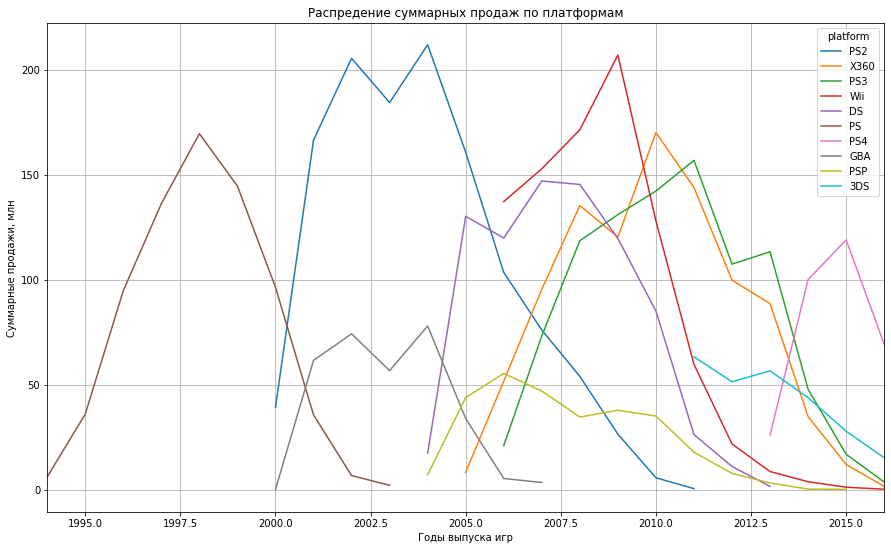

In [19]:
# Создание сводной таблицы для суммарных продаж на платформах по годам
platform_sales = games.pivot_table(index='year_of_release', columns='platform', values='total_sales', aggfunc='sum')

# Вывод графика для 10 платформ с наибольшими суммарными продажами, список платформ взят из предыдущего вывода
platform_sales[['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']].plot(
    grid=True, figsize=(15, 9), xlabel='Годы выпуска игр', 
    ylabel='Суммарные продажи, млн', title='Распредение суммарных продаж по платформам')
plt.xlim(1994, 2016)
plt.show()

По графикам видно, что средний "срок жизни" игровых платформ составляет порядка 5-7 лет. Затем им на смену приходит новое поколение. Это хорошо видно по семейству PlayStation(PS):

PS первого поколения набирала популярность с 1995 года и в 2000 году, на рубеже милениумов и спаде популярности появилось второе поколение PS2 и по аналогии продержалось примерно до 2007 года и сменилось на PS3.

In [20]:
# Комментарий ревьюера
temp = games.copy() 
time_life = temp.pivot_table(index='platform', values='year_of_release', aggfunc=['min', 'max']).reset_index()
time_life['life'] = time_life['max'] - time_life['min'] + 1 # в срок жизни платформы, должны входить границы диапазона, 
                                                            # поэтому +1
time_life['life'].median()

7.0

### Изучение актуального периода

За актуальный период был взят промежуток с 2014 по 2016 года. Так как это самый близкий период к планируемому 2017 году и на нём нет такого скачка ("бума") как под конец 2010, виден потенциал для роста.

In [21]:
# Создание нового датафрейма с помощью среза по актуальным годам
games_actual = games.query('2014 <= year_of_release <= 2016')
platform_sales = (platform_sales[['PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', '3DS']]
                  .query('2014 <= year_of_release <= 2016'))

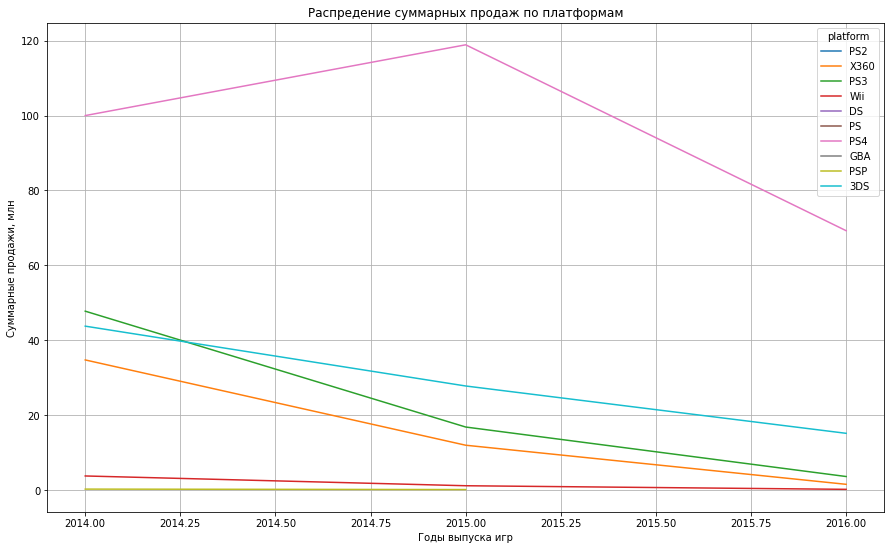

In [22]:
# Вывод графика по продажам для платформ за 3 года
platform_sales.plot(grid=True, figsize=(15, 9), xlabel='Годы выпуска игр', 
    ylabel='Суммарные продажи, млн', title='Распредение суммарных продаж по платформам')
plt.show()

На графике за актуальный период наблюдается массовый спад суммарных продаж по всем платформам, кроме PlayStation4 (PS4).

Так же виден "закат" для таких платформ как `X360` и `PS3`, похоже, их время закончилось.

Потенциально прибыльной платформой выглядит только `PS4`.

### Глобальные продажи по платформам

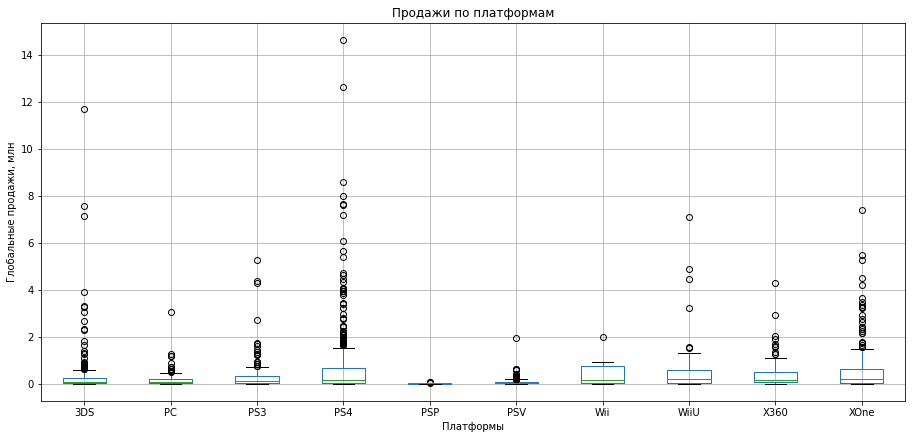

In [23]:
# Построение диаграммы размаха глобальных продаж по платформам
games_actual.boxplot(column='total_sales', by='platform', figsize=(15,7))
plt.title('Продажи по платформам')
plt.ylabel('Глобальные продажи, млн')
plt.xlabel('Платформы')
plt.suptitle('')
plt.show()

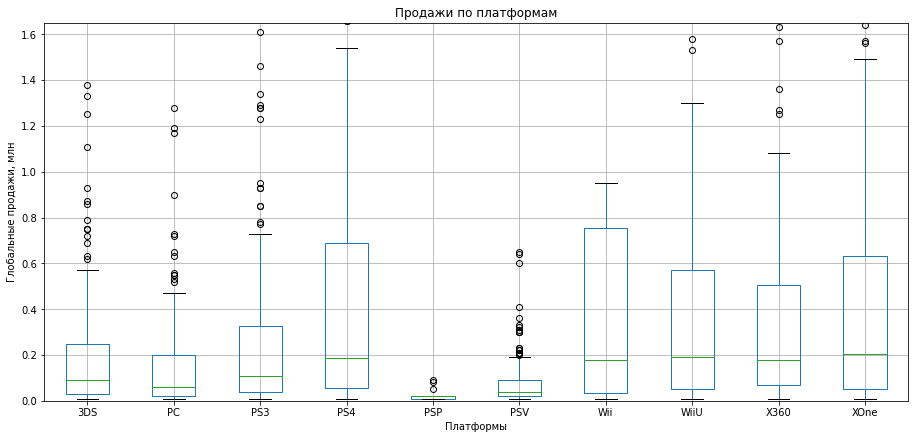

In [24]:
# Масштабирую диаграммы размаха
games_actual.boxplot(column='total_sales', by='platform', figsize=(15,7))
plt.title('Продажи по платформам')
plt.ylabel('Глобальные продажи, млн')
plt.xlabel('Платформы')
plt.suptitle('')
plt.ylim(0, 1.65)
plt.show()

На основании диаграмм размаха можно сделать следующие выводы:
* По медианным значениям продаж самыми прибыльными платформами являются `PS4`, `Wii`, `XOne`, `WiiU` и `X360`;
* Продажи игр на платформе `PSP` ничтожно малы;
* Самые большие "ящики" (расстояние между первым и третьим квартилями) у `Wii`, конкуренцию ему может составить  только `PS4`, однако она выигрывает в размере "уса, обладая максимальным крайнем значением.

### Исследование влияния отзывов покупателей и критиков на продажи

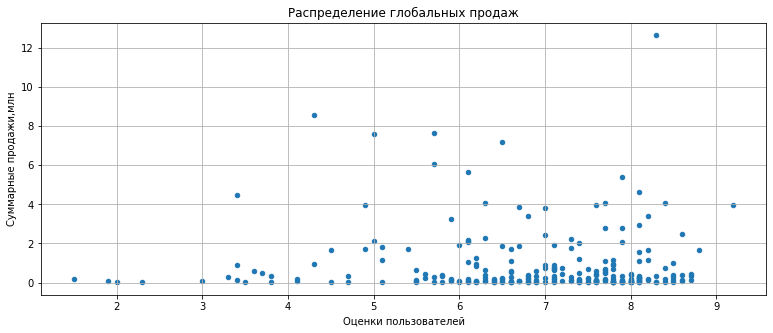

Коэффициент корреляции Пирсона: -0.04


In [25]:
# Построение графика распределения глобальных продаж и расчет коэффициента корреляции 
# по оценкам пользователей, для одной из самых популярных платформ PS4

games_actual[games_actual['platform'] == 'PS4'].plot(x='user_score', y='total_sales', kind='scatter', figsize=(13,5), 
    grid=True, xlabel='Оценки пользователей', ylabel='Суммарные продажи,млн', 
    title='Распределение глобальных продаж')
plt.show()
print('Коэффициент корреляции Пирсона:', (round(games_actual[games_actual['platform'] == 'PS4']
                                                ['total_sales'].corr(games_actual['user_score']), 2)))

По полученным результатам можно сделать вывод, что оценки пользователей практически не влияют на продажи.

В подтверждение этому служит коэффициент корреляции, значение которого близко к 0, что говорит о практическом отсутствии корреляции.

На такие результаты могло повлиять больше количество пропусков в исследуемом столбце `user_score`.

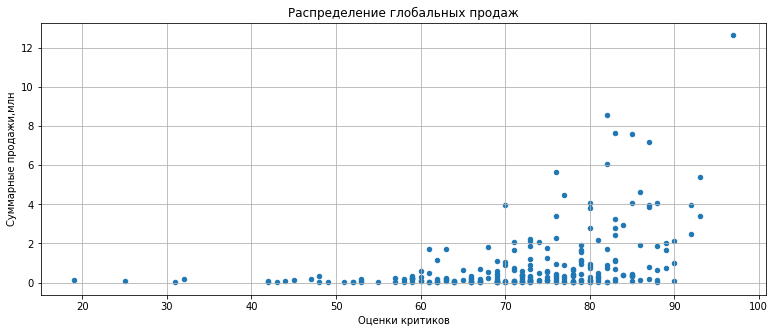

Коэффициент корреляции Пирсона: 0.4


In [26]:
# Построение графика распределения глобальных продаж и расчет коэффициента корреляции 
# по оценкам пользователей, для одной из самых популярных платформ PS4

games_actual[games_actual['platform'] == 'PS4'].plot(x='critic_score', y='total_sales', kind='scatter',
    figsize=(13,5), grid=True, xlabel='Оценки критиков', ylabel='Суммарные продажи,млн', 
    title='Распределение глобальных продаж')
plt.show()
print('Коэффициент корреляции Пирсона:', (round(games_actual[games_actual['platform'] == 'PS4']
                                                ['total_sales'].corr(games['critic_score']), 2)))

Здесь наблюдается слабая зависимость глобальных продаж от оценки критиков.

Подтверждает это наблюдение коэффициент корреляции, который равен 0.4. Это говорит о наличие средней положительной корреляции, т.е. чем выше оценка критиков, тем больше продажи.

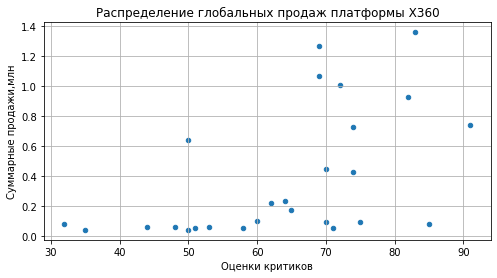

Коэффициент корреляции Пирсона: 0.53


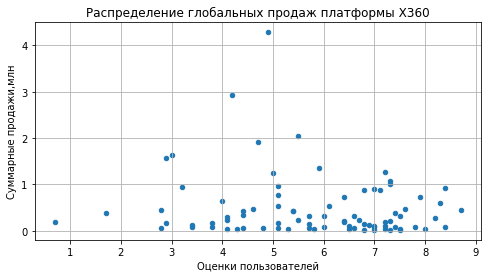

Коэффициент корреляции Пирсона: -0.14


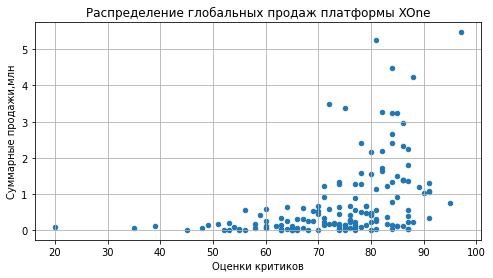

Коэффициент корреляции Пирсона: 0.43


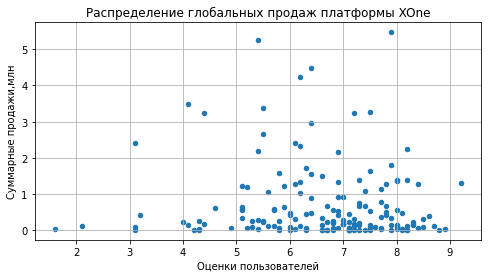

Коэффициент корреляции Пирсона: -0.07


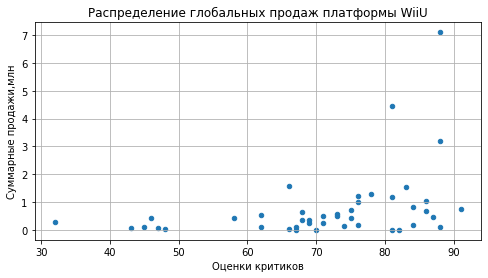

Коэффициент корреляции Пирсона: 0.37


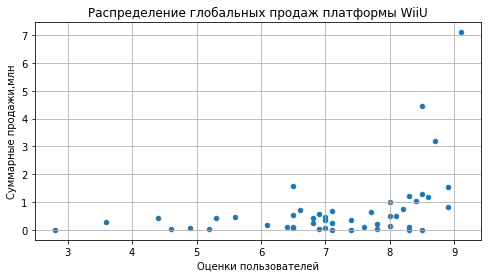

Коэффициент корреляции Пирсона: 0.41


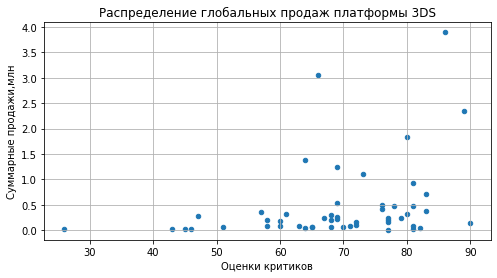

Коэффициент корреляции Пирсона: 0.31


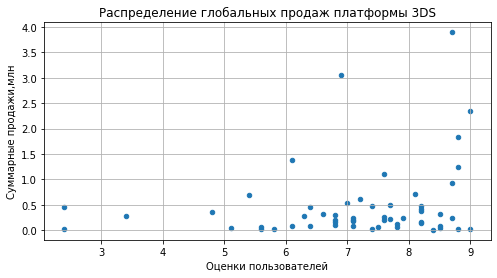

Коэффициент корреляции Пирсона: 0.22


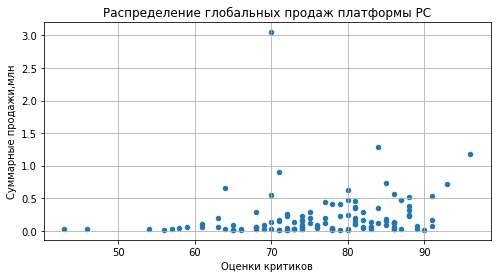

Коэффициент корреляции Пирсона: 0.17


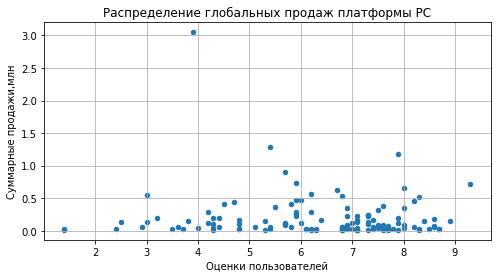

Коэффициент корреляции Пирсона: -0.07


In [27]:
# Создание списка прибыльных платформ
profitable_platforms = ['X360', 'XOne', 'WiiU', '3DS', 'PC']
# Цикл построения диаграмм и расчета коэффициента корреляции
for name_platforms in profitable_platforms:
    games_actual[games_actual['platform'] == name_platforms].plot(x='critic_score', y='total_sales', kind='scatter',
    figsize=(8,4), grid=True, xlabel='Оценки критиков', ylabel='Суммарные продажи,млн', 
    title='Распределение глобальных продаж платформы '+name_platforms)
    plt.show()
    print('Коэффициент корреляции Пирсона:', (round(games_actual[games_actual['platform'] == name_platforms]
                                                ['total_sales'].corr(games['critic_score']), 2)))
    games_actual[games_actual['platform'] == name_platforms].plot(x='user_score', y='total_sales', kind='scatter', 
    figsize=(8,4), grid=True, xlabel='Оценки пользователей', ylabel='Суммарные продажи,млн', 
    title='Распределение глобальных продаж платформы '+name_platforms)
    plt.show()
    print('Коэффициент корреляции Пирсона:', (round(games_actual[games_actual['platform'] == name_platforms]
                                                ['total_sales'].corr(games_actual['user_score']), 2)))

Практически по всем платформам аналогичная закономерность - положительная корреляция продаж с оценками критиков и отсутствие, либо очень слабая обратная корреляция с пользовательскими оценками.

Сильно выбиваются только игры на персональные компьютеры `PC`, у них самая слабая связь между оценками критиков и продажами. С другой стороны они единственные представители не консольной платформы.

### Распределение игр по жанрам

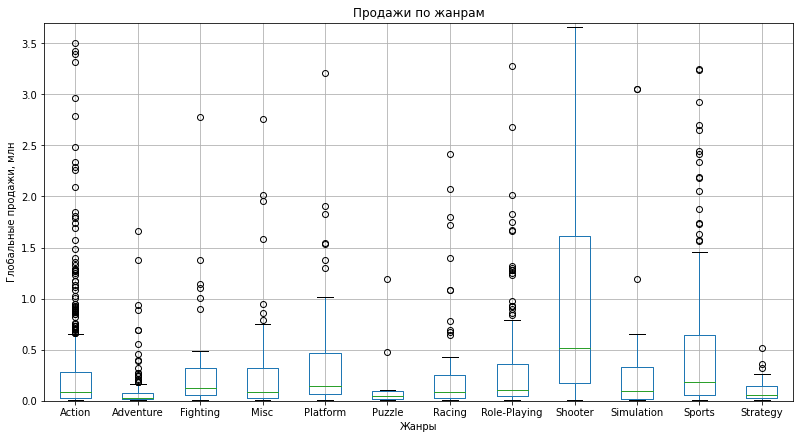

In [28]:
# Построение диаграмм размаха глобальных продаж по жанрам c помощью группировки

games_actual.boxplot(column='total_sales', by='genre', figsize=(13,7))
plt.title('Продажи по жанрам')
plt.ylabel('Глобальные продажи, млн')
plt.xlabel('Жанры')
plt.suptitle('')
plt.ylim(0, 3.7)
plt.show()

На основании диаграмм размаха глобальных продаж, можно сделать следующие выводы:
* Самым прибыльным жанром с большим преимуществом является `Shooter`;
* На втором месте по медианне продаж оказались спортивные игры `Sports`;
* Хуже остальных жанров в плане прибыли - `Strategy`, `Adventure` и `Puzzle`.

## Составление портрета пользователя каждого региона

### Самые популярные платформы

In [29]:
# Создание сводной таблицы и расчёт доли продаж для NA-региона
platform_sales_na = games_actual.pivot_table(index='platform',values=['na_sales','total_sales'], aggfunc='sum')
platform_sales_na['ratio'] = round(platform_sales_na['na_sales'] / platform_sales_na['total_sales'], 2) * 100
print ('Топ-5 по продажам в NA-регионе в %:', platform_sales_na['ratio'].sort_values(ascending=False).head())

Топ-5 по продажам в NA-регионе в %: platform
X360    59.0
XOne    58.0
WiiU    45.0
Wii     41.0
PS4     34.0
Name: ratio, dtype: float64


Как видно из топа - на Северо-Американском рынке доминируют местные платформы, разработанные и выпускавшиеся в США. То есть Иксбоксы - `X360` и `XOne`

In [30]:
# Создание сводной таблицы и расчёт и расчёт доли продаж для EU-региона
platform_sales_eu = games_actual.pivot_table(index='platform',values=['eu_sales','total_sales'], aggfunc='sum')
platform_sales_eu['ratio'] = round(platform_sales_eu['eu_sales'] / platform_sales_eu['total_sales'], 2) * 100
print ('Топ-5 по продажам в EU-регионе в %:', platform_sales_eu['ratio'].sort_values(ascending=False).head())

Топ-5 по продажам в EU-регионе в %: platform
PC      66.0
Wii     51.0
PS4     45.0
PS3     37.0
XOne    33.0
Name: ratio, dtype: float64


Среди европейцев популярнее остальных персональные компьютеры (`PC`). Возможно, это связано с тем, что в Европе не было "своих" популярных платформ.

In [31]:
# Создание сводной таблицы и расчёт доли продаж для JP-региона
platform_sales_jp = games_actual.pivot_table(index='platform',values=['jp_sales','total_sales'], aggfunc='sum')
platform_sales_jp['ratio'] = round(platform_sales_jp['jp_sales'] / platform_sales_jp['total_sales'], 2) * 100
print ('Топ-5 по продажам в JP-регионе в %:', platform_sales_jp['ratio'].sort_values(ascending=False).head())

Топ-5 по продажам в JP-регионе в %: platform
PSP     100.0
PSV      65.0
3DS      51.0
WiiU     17.0
PS3      16.0
Name: ratio, dtype: float64


Из топ-5 по японскому региону видна их страсть к портативным платформам, таким как PlayStation Portable (`PSP`) и PlayStation Vita (`PSV`).

### Самые популярные жанры

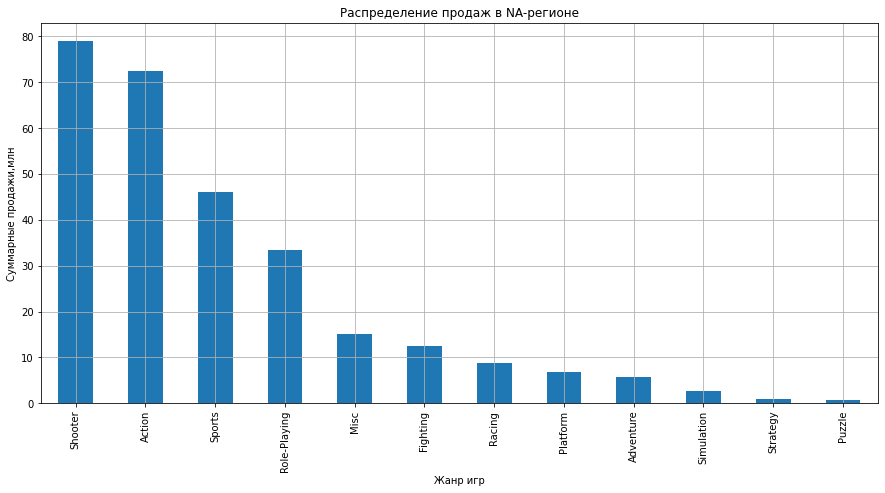

In [32]:
# Построение столбчатой диаграммы по убыванию значения суммарных продаж
games_actual.groupby('genre')['na_sales'].sum().sort_values(ascending=False).plot.bar(figsize=(15,7),
    grid=True, xlabel='Жанр игр', ylabel='Суммарные продажи,млн', title='Распределение продаж в NA-регионе')
plt.show()

Из этой диаграммы видно, что самыми популярными жанрами у американцев являются: `Action`, `Shooter`, `Sports`, `Role-Playing` и `Misc`. Такая любовь обусловлена, скорее всего, влиянием Голливуда и его творений - боевиков.

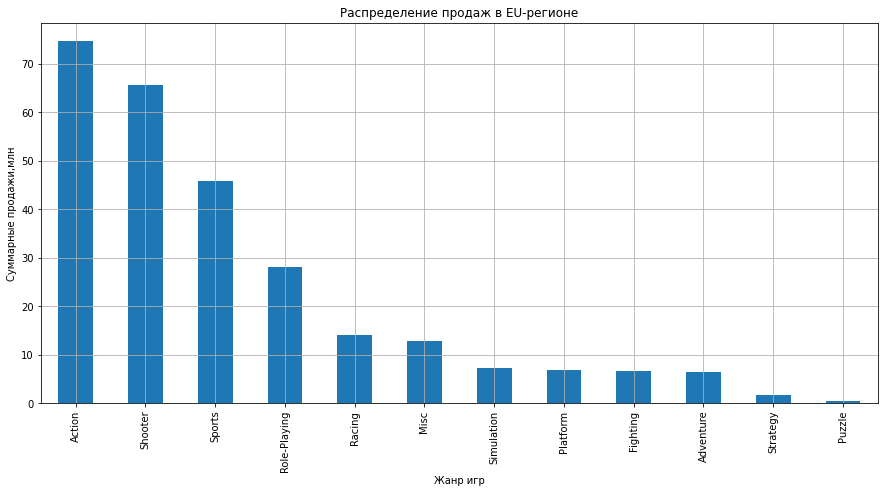

In [33]:
# Построение столбчатой диаграммы по убыванию значения суммарных продаж
games_actual.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).plot.bar(figsize=(15,7),
    grid=True, xlabel='Жанр игр', ylabel='Суммарные продажи,млн', title='Распределение продаж в EU-регионе')
plt.show()

Топ-5 европейских игроков полностью совпадает с их товарищами с другого континента - Северной Америки.

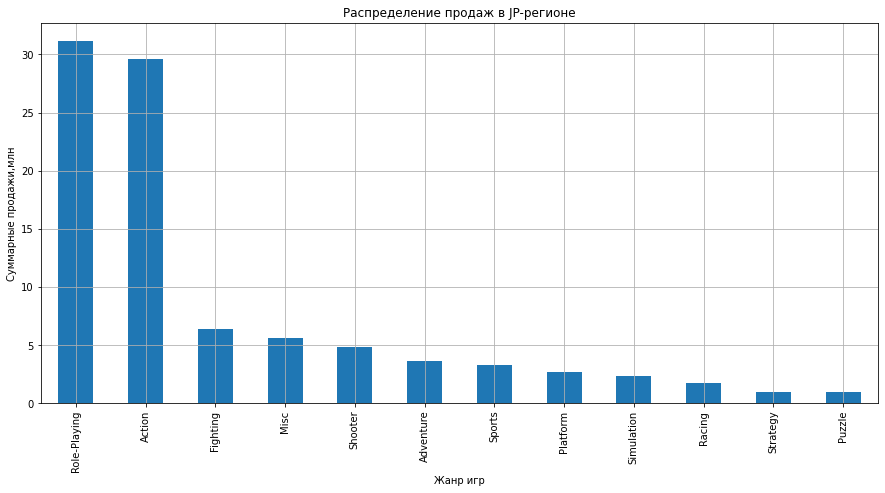

In [34]:
# Построение столбчатой диаграммы по убыванию значения суммарных продаж
games_actual.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).plot.bar(figsize=(15,7),
    grid=True, xlabel='Жанр игр', ylabel='Суммарные продажи,млн', title='Распределение продаж в JP-регионе')
plt.show()

Судя по диаграмме, у японцев повальная мода на РПГ(`Role-Playing`) и Экшены(`Action`), которая обусловлена вероятнее всего тем, что Япония была долгое время закрытой страной со своей особой культурой и менталитетом, что вылилось в отдельный поджанр - японских ролевых игр(JRPG).

### Влияние рейтинга ESRB на продажи в отдельных регионах

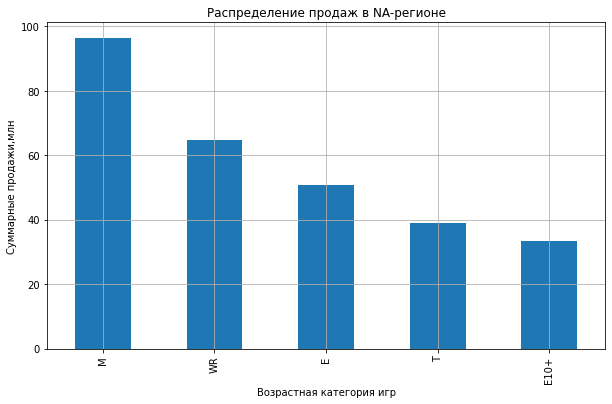

In [35]:
# Построение столбчатой диаграммы по убыванию значения суммарных продаж
games_actual.groupby('rating')['na_sales'].sum().sort_values(ascending=False).plot.bar(figsize=(10,6),
    grid=True, xlabel='Возрастная категория игр', ylabel='Суммарные продажи,млн',
    title='Распределение продаж в NA-регионе')
plt.show()

Для NA-региона возрастной рейтинг оказывает большое влияние на продажи.

Так, доля продаж игр категории `M`(Mature) является доминирующей.

Игры категории `E10+`(Everyone 10 and older) оказываются обреченными на неудачу и занимают последнее место по сумме продаж.

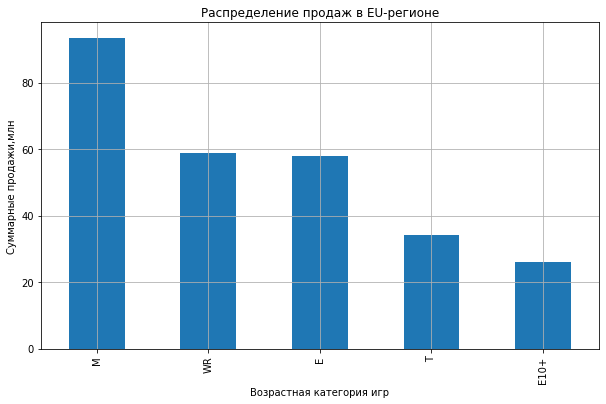

In [36]:
# Построение столбчатой диаграммы по убыванию значения суммарных продаж
games_actual.groupby('rating')['eu_sales'].sum().sort_values(ascending=False).plot.bar(figsize=(10,6),
    grid=True, xlabel='Возрастная категория игр', ylabel='Суммарные продажи,млн',
    title='Распределение продаж в EU-регионе')
plt.show()

Как и с распределением по жанрам, европейские предпочтения в категориях игр практически совпадают с американскими, разница лишь в объёмах продаж.

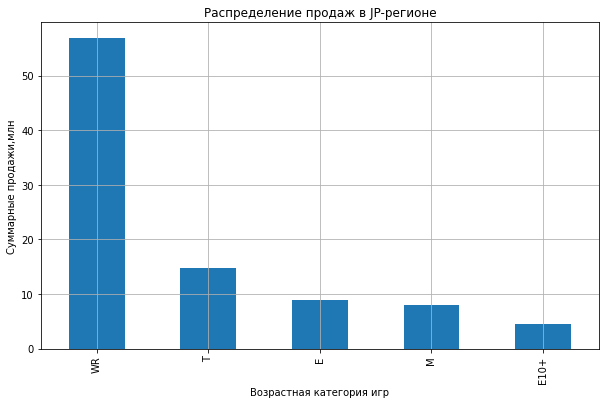

In [37]:
# Построение столбчатой диаграммы по убыванию значения суммарных продаж
games_actual.groupby('rating')['jp_sales'].sum().sort_values(ascending=False).plot.bar(figsize=(10,6),
    grid=True, xlabel='Возрастная категория игр', ylabel='Суммарные продажи,млн',
    title='Распределение продаж в JP-регионе')
plt.show()

И здесь японцы оказались обособленны.

Так как рейтинг ESRB предназначен для маркировки игр для США и Канады, то большинство игр яонского региона оказались без возрастного рейтинга со специальным значением-заглушкой `WR`(Without Rating).

In [38]:
# Комментарий ревьюера
temp = games_actual.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts(dropna=False)

0 0.0


WR      749
T       271
M       265
E       219
E10+    185
Name: rating, dtype: int64

## Проверка гипотез

### Средние пользовательские рейтинги платформ Xbox One и PC одинаковые.

**Формулирование гипотез:**

H0: Средние значения пользовательских рейтингов платформ Xbox One и PC равны.

H1: Средние значения пользовательских рейтингов платформ Xbox One и PC не равны.

In [39]:
# Удаляю NaN-значения из столбца 'user_score' для проведения дальнейшего теста
games_actual = games_actual.dropna(subset=['user_score'])

print('Среднее выборки пользовательских рейтингов платформы Xbox One:',
      games_actual[games_actual['platform'] == 'PC']['user_score'].mean())
print('Среднее выборки пользовательских рейтингов платформы PC:', 
      games_actual[games_actual['platform'] =='XOne']['user_score'].mean())

# Выбираю двухвыборочный t-тест для независимых выборок
results = st.ttest_ind(games_actual[games_actual['platform'] == 'PC']['user_score'],
                       games_actual[games_actual['platform'] =='XOne']['user_score'])

# Выбираю пороговое значение статистической значимости 5%
alpha = 0.05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

Среднее выборки пользовательских рейтингов платформы Xbox One: 6.298360655737705
Среднее выборки пользовательских рейтингов платформы PC: 6.594545454545456
p-значение: 0.10450507919348415
Не удалось отвергнуть нулевую гипотезу


После проверки гипотезы, отвергнуть её нельзя, поэтому не получится точно сказать, что средние значения пользовательских рейтингов платформ Xbox One и PC равны.

### Средние пользовательские рейтинги жанров Action и Sports разные.

**Формулировка гипотез:**

H0: Средние значения пользовательских рейтингов жанров Action и Sports равны.

H1: Средние значения пользовательских рейтингов платформ Action и Sports различаются.

In [40]:
print('Среднее выборки пользовательских рейтингов жанрa Action', 
      games_actual[games_actual['genre'] == 'Action']['user_score'].mean())
print('Среднее выборки пользовательских рейтингов жанрa Sports:', 
      games_actual[games_actual['genre'] =='Sports']['user_score'].mean())

# Выбираю двухвыборочный t-тест для независимых выборок
results = st.ttest_ind(games_actual[games_actual['genre'] == 'Action']['user_score'], 
                       games_actual[games_actual['genre'] =='Sports']['user_score'])

# Выбираю пороговое значение статистической значимости 5%
alpha = 0.05

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не удалось отвергнуть нулевую гипотезу')

Среднее выборки пользовательских рейтингов жанрa Action 6.760606060606061
Среднее выборки пользовательских рейтингов жанрa Sports: 5.2251968503937
p-значение: 2.8711147985105864e-19
Отвергаем нулевую гипотезу


В результате теста нулевая гипотеза была отвергнута.

Нулевую гипотезу (Н0) формулируют так, что если исследуется, равна ли некоторая величина другой, то нулевая гипотеза будет предполагать, что равна. А альтернативная гипотеза (Н1) зависит от того, какое изменение нас интересует - в большую, меньшую или обе стороны.

Так как даны две независимые выборки и проверяются гипотезы о равенстве средних двух генеральных совокупностей, то используется t-тест `scipy.stats.ttest_ind`.

В данных случаях для нас было не важно, в какую сторону имеется изменение, поэтому в обоих t-тестах значение аргумента `alternative` было равно значению по умолчанию (`two-sided`) и проверялась двусторонняя гипотеза.

<h4> Предобработка данных:  <a class="tocSkip"></h4>
    
* В ходе предобработки данных было обнаружено большое количество пропусков в предоставленных данных. В столбцах где количество пропусков минимально `name`, `year_of_release`, `genre` - были удалены строки. Другие пропуски были оставлены, так как ни восстановить, ни заполнить их без влияния на распределение не представляется возможным;
* Датасет был проверен на явные и неявные дубликаты;
* В столбце с возрастным рейтингом `rating` пропуски были заполнены заглушкой `WR` (Без рейтинга);
* В столбце `user_score` обнаружились значения `tbd`, которые были заменены на NaN-значения, так как для расчетов они имеют одинаковый смысл;
* Тип данных в столбце `user_score` датафрейма был привидён к формату `float`, для дальнейших арифметических действий;
* Был создан столбец `total_sales`, который содержит сумму продаж игр по всем рассматриваемым регионам.

<h4> Результаты проекта:  <a class="tocSkip"></h4>
    
1. Средний "цикл жизни" платформы составляет 7 лет, после чего продажи игр для неё резко падают;
2. Рассматривая актуальный период с 2014 по 2016 года, прибыльной платформой выглядит только PlayStation 4 (`PS4`), остальные находятся в упадке. Она же является одной самых популярных платформ для игр;
3. Оценки пользователей не влияют на глобальные продажи игр, однако оценки критиков имеют значение. Как показали графики и коэффициенты корреляции - чем выше оценка критика, тем больше прибыли приносит игра;
4. Самым популярным жанром в трёх регионах является `Action`. Меньше всех повезло жанру `Puzzle` - игры этого жанра последние по прибыли;
5. Как показало исследование портретов пользователей разных регионов - JP-регион держится особняком, свои платформы, свои поджанры и т.д. По жанровым предпочтениям и влиянию возрастного рейтинга европейцы не отличаются от американцев - они любят `Action` и `Shooter`, а из возрастных категорий предпочитают `M` (Для взрослых). И по платформам американцы похожи на япоцнев - на первых местах по прибыли собственные разработки;
6. Отвергнуть гипотезу о том, что средние пользовательские рейтинги платформ Xbox One и PC одинаковые, не удалось.
7. Гипотеза о том, что средние пользовательские рейтинги жанров `Action` и `Sports` равны, была отвергнута.
    
<h4> Рекомендации  <a class="tocSkip"></h4>
    
* Платформы игр нужно менять примерно каждые 7 лет. Так как спустя это время неизбежно возникают падение спроса и прибыли. И фокусироваться на новых, актуальных, будущих поколениях платформ;
* Чтобы получать хорошую прибыль, в первую очередь необходимо рассматривать платформы семейства PlayStation (`PS4`), так как они стабильно находятся в топе;
* Продавать игры с низкими оценками критиков - плохая идея. Их оценки достаточно влияют на продажи;
* Если выбирать по жанрам, то однозначно нужно отдать предпочтение `Shooter` и `Sports`. Игры таких жанров являются лидерами по продажам в развлекательной индустрии;
* Для японского рынка не имеет особого смысла предлагать игры других регионов, они предпочитают "народные" платформы и игры;
* Американский рынок тоже поощряет отечественных производителей платформ, в то время как европейцы предпочитают персональные компьютеры `PC`;
* Для EU и NA регионов приоритетнее будут игры с возрастной категорией `M`(Для взрослых), а у JP-региона - свои игры без возрастного рейтинга ESRB.